In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler

In [34]:
dataset = pd.read_csv('heart_disease.csv')
dataset

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


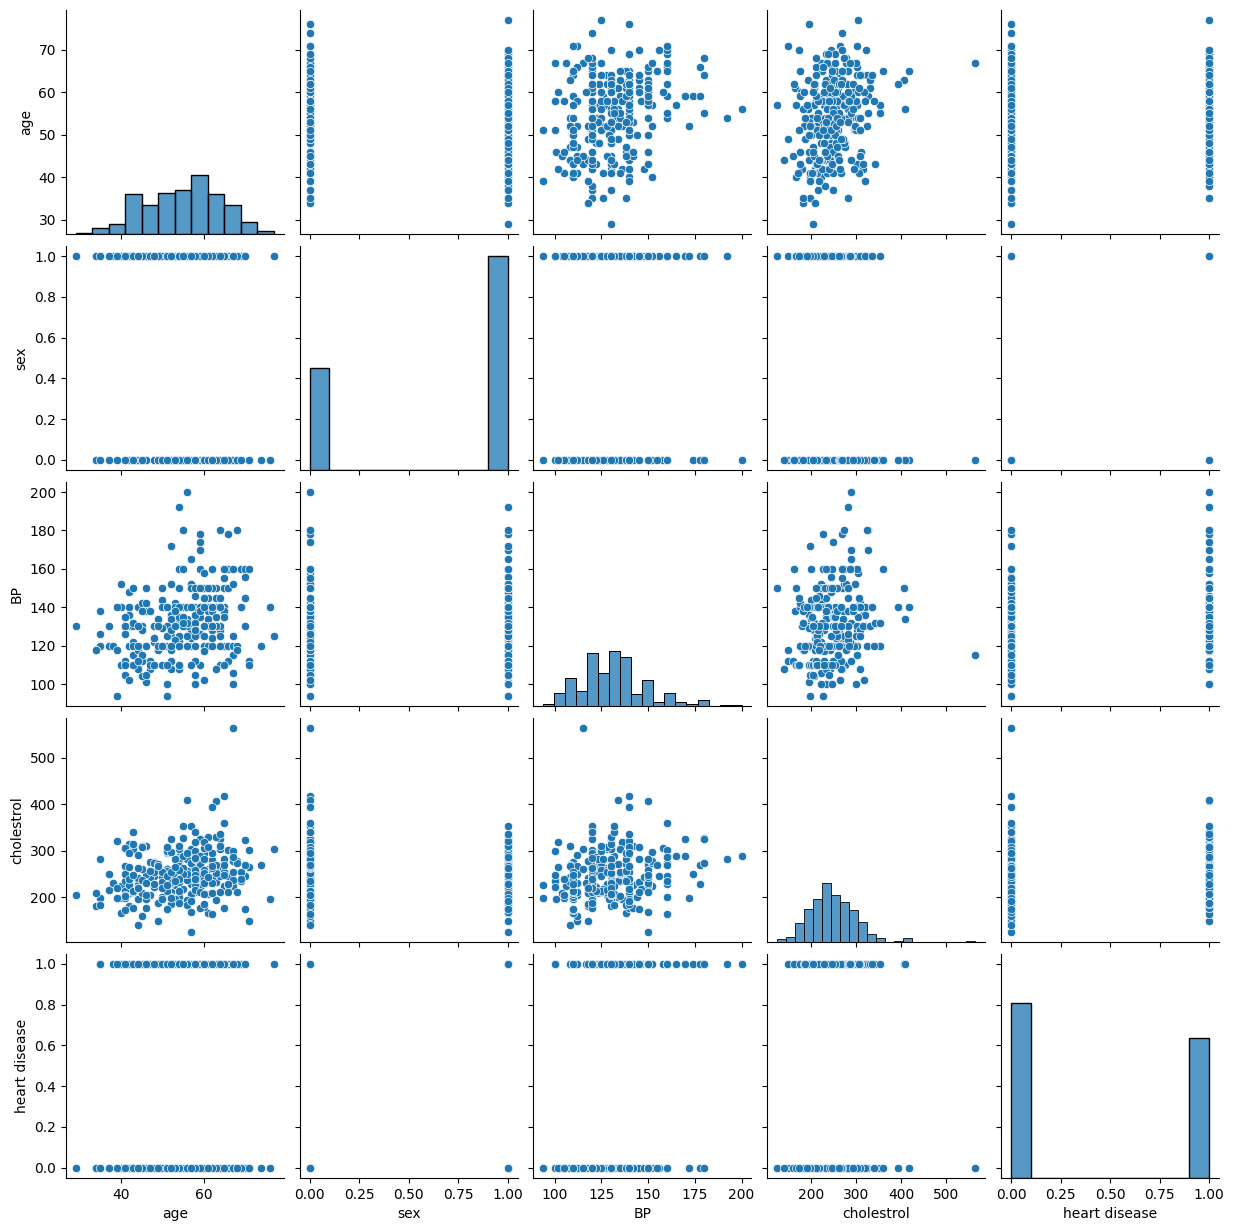

In [35]:
sns.pairplot(dataset)

In [36]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

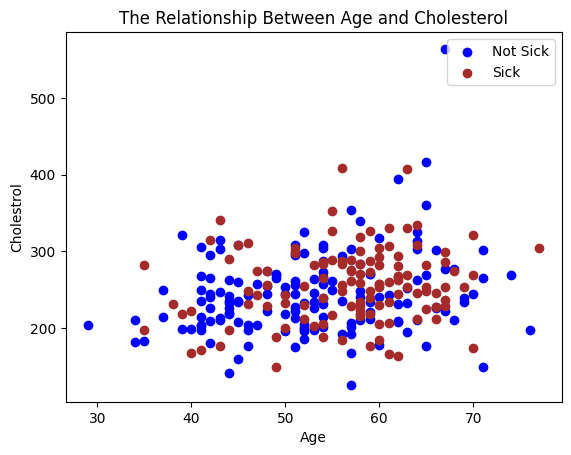

In [37]:
classes = {0: 'Not Sick', 1: 'Sick'}
colors = {0: 'blue', 1: 'brown'}

for class_value in np.unique(y):
    plt.scatter(X[y == class_value][:,0], X[y == class_value][:,-1], 
                c=colors[class_value], label=classes[class_value])
    
plt.ylabel("Cholestrol")
plt.xlabel("Age")
plt.title("The Relationship Between Age and Cholesterol")
plt.legend()
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 4), (54, 4), (216,), (54,))

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7037037037037037


In [42]:
f1 = f1_score(y_test,y_pred,average='micro')
print(f"f1 Score: {f1}")

f1 Score: 0.7037037037037037


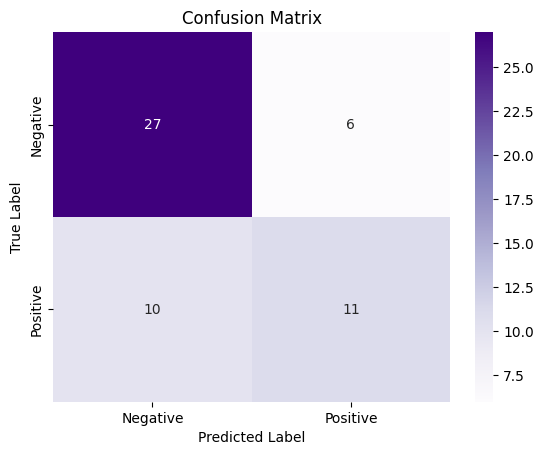

In [43]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()